## Exploring Datasets with pandas and Matplotlib

Toolkit: Section ini sangat bergantung pada pandas dan Numpy untuk data wrangling, analysis, dan visualization. 

Datasets:

Immigration to Canada from 1980 to 2013 - International migration flows to and from selected countries - The 2015 revision from United Nation's website. The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. For this lesson, we will focus on the Canadian Immigration data

## Downloading and Prepping Data

In [37]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts
from wordcloud import WordCloud, STOPWORDS

import seaborn as sns



mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print ('Wordcloud is installed and imported!')
print('Seaborn installed and imported!')

Matplotlib version:  3.7.1
Wordcloud is installed and imported!
Seaborn installed and imported!


In [2]:
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.shape

(195, 43)

Bersihkan data. Kita akan melakukan beberapa modifikasi pada dataset asli untuk mempermudah pembuatan visualisasi kita. Lihat Basic Visualization, Line Plots and Area Plots, Histograms, dan Bar Plots untuk penjelasan rinci tentang preprocessing ini.

In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10988\2754968886.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] =  df_can.sum (axis = 1)


## Visualizing Data using Matplotlib

## Waffle Charts (Optional)

Waffle chart adalah visualisasi menarik yang biasanya dibuat untuk menampilkan progress menuju tujuan. Waffle Chart biasanya merupakan opsi yang efektif saat kalian mencoba menambahkan fitur visualisasi yang menarik ke visual yang sebagian besar terdiri dari sel, seperti dasbor Excel.

Mari kita lihat kembali studi kasus sebelumnya tentang Denmark, Norwegia, dan Swedia.

In [6]:
df_dsn = df_can.loc[['Denmark','Norway','Sweden'],:] # let's create a new dataframe for these three countries 
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Sayangnya, tidak seperti R, waffle charts tidak built in dalam pustaka visualisasi Python mana pun. Oleh karena itu, kita akan belajar cara membuatnya dari awal.

Step 1. Langkah pertama untuk membuat waffle adalah menentukan proporsi setiap kategori sehubungan dengan totalnya.

In [7]:
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value)/total_values)for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportions):
    print("Negara",df_dsn.index.values[i] + ': ' + str(proportion))

Negara Denmark: 0.32255663965602777
Negara Norway: 0.1924094592359848
Negara Sweden: 0.48503390110798744


Step 2. Langkah kedua adalah menentukan ukuran keseluruhan dari waffle chart.

In [8]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


Step 3. Langkah ketiga adalah menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori



In [9]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


Berdasarkan proporsi yang dihitung, Denmark akan menempati 129 ubin, Norwegia akan menempati 77 ubin, dan Swedia akan menempati 194 ubin.

Step 4. Langkah keempat adalah membuat matriks yang menyerupai wafel dan mengisinya.



In [10]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [11]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

Seperti yang diharapkan, matriks terdiri dari tiga kategori dan jumlah total instance setiap kategori sesuai dengan jumlah ubin yang dialokasikan untuk setiap kategori.

Step 5. Petakan matriks waffle chart menjadi visual.

<Figure size 640x480 with 0 Axes>

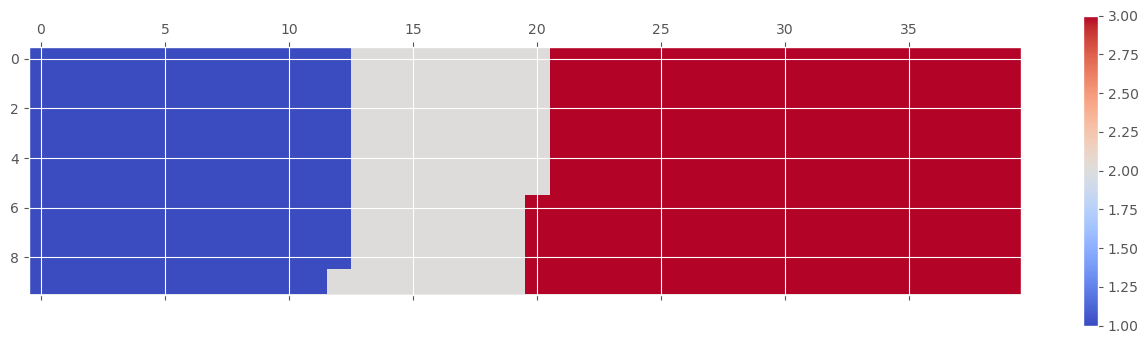

In [12]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

Step 6. Percantik chart

([], [])

<Figure size 640x480 with 0 Axes>

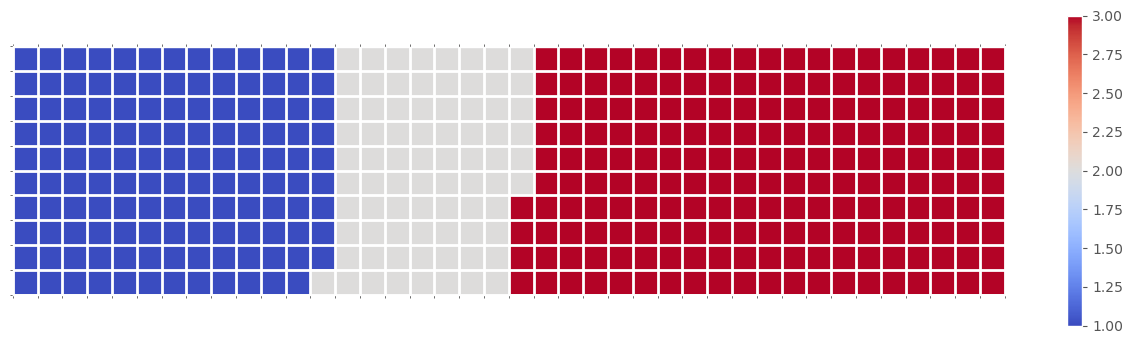

In [13]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

Step 7. Tambahkan legend

<Figure size 640x480 with 0 Axes>

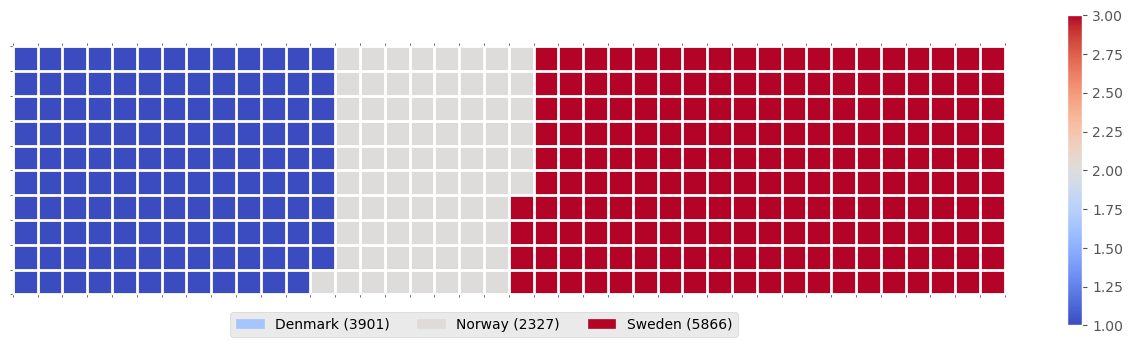

In [14]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

Sekarang akan sangat tidak efisien untuk mengulangi ketujuh langkah ini setiap kali kita ingin membuat waffle. Jadi mari kita gabungkan ketujuh langkah menjadi satu fungsi yang disebut create_waffle_chart. Fungsi ini akan mengambil parameter berikut sebagai masukan:

1. categories: Unique categories or classes in dataframe.
2. values: Values corresponding to categories or classes.
3. height: Defined height of waffle chart.
4. width: Defined width of waffle chart.
5. colormap: Colormap class
6. value_sign: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. value_sign has a default value of empty string.


In [15]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Sekarang untuk membuat waffle, yang harus kita lakukan adalah memanggil fungsi create_waffle_chart. Mari tentukan parameter input:

In [16]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Dan sekarang mari kita panggil fungsi kita untuk membuat waffle.

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

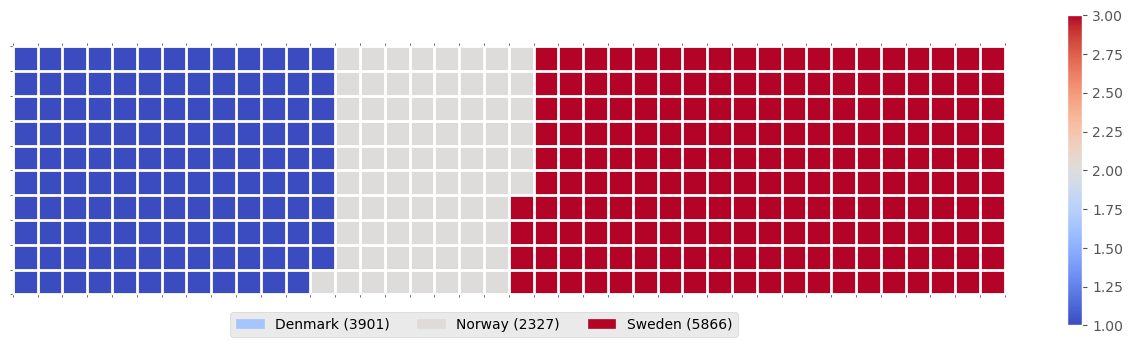

In [17]:
create_waffle_chart(categories, values, height, width, colormap)

## Word Clouds

Word clouds (juga dikenal sebagai text clouds atau tag clouds) bekerja dengan cara yang sederhana: semakin banyak kata tertentu muncul dalam sumber data tekstual (seperti pidato, posting blog, atau database), semakin besar dan tebal kata itu muncul di kata cloud.

Untungnya, sebuah package sudah ada di Python untuk menghasilkan word clouds. Package bernama word_cloud dikembangkan oleh Andreas Mueller. Kalian dapat mempelajari lebih lanjut tentang paket dengan mengikuti link ini.

Mari gunakan package ini untuk mempelajari cara menghasilkan word cloud untuk dokumen teks tertentu.

Word clouds biasanya digunakan untuk melakukan analisis tingkat tinggi dan visualisasi data teks. Secara bersamaan, mari kita keluar dari kumpulan data imigrasi dan bekerja dengan contoh yang melibatkan analisis data teks. Mari kita coba menganalisis novel pendek karangan Lewis Carroll berjudul Alice's Adventures in Wonderland. Ayo lanjutkan dan unduh file .txt dari novel.

In [18]:
# !wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


Selanjutnya, mari gunakan stopwords yang kita impor dari word_cloud. Kita menggunakan set untuk menghapus stopword yang berlebihan.

In [19]:
stopwords = set(STOPWORDS)

Buatword cloud object dan generate word cloud. Agar lebih ringkas, mari kita buat word cloud hanya dengan menggunakan 2000 kata pertama dalam novel.

In [20]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

Hebat! Sekarang setelah word cloud dibuat, mari kita visualisasikan.

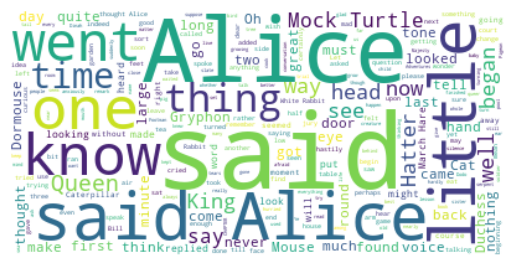

In [21]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Menarik! Jadi di 2000 kata pertama dalam novel, kata yang paling umum adalah Alice, said, little, went dan seterusnya. Mari ubah ukuran cloud sehingga kita dapat melihat kata-kata yang jarang digunakan dengan lebih baik.

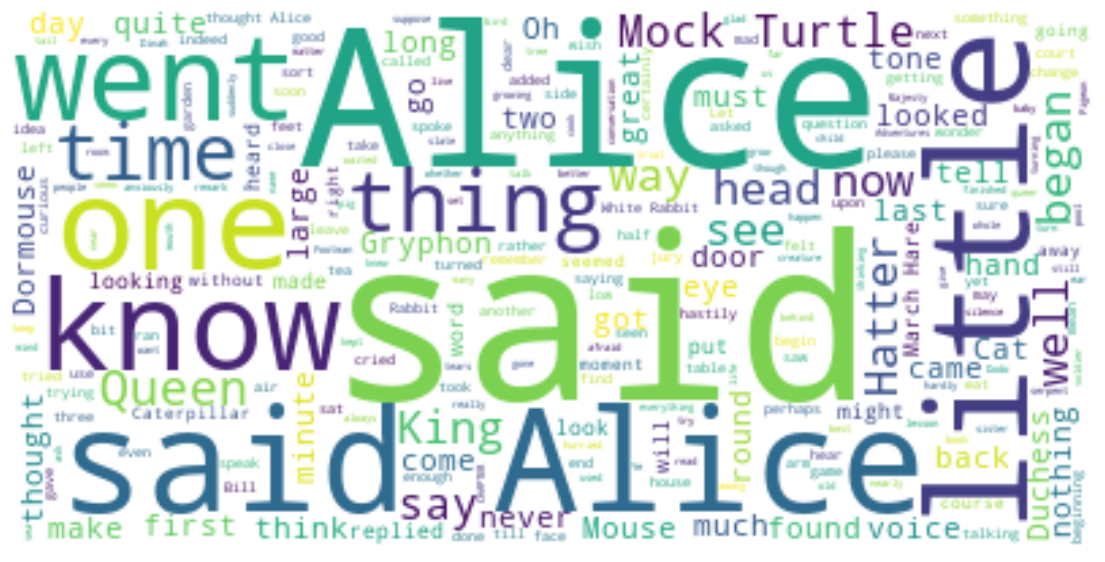

In [22]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Jauh lebih baik! Namun, said bukanlah kata yang informatif. Jadi, mari tambahkan ke stopwords kita dan buat ulang cloud.

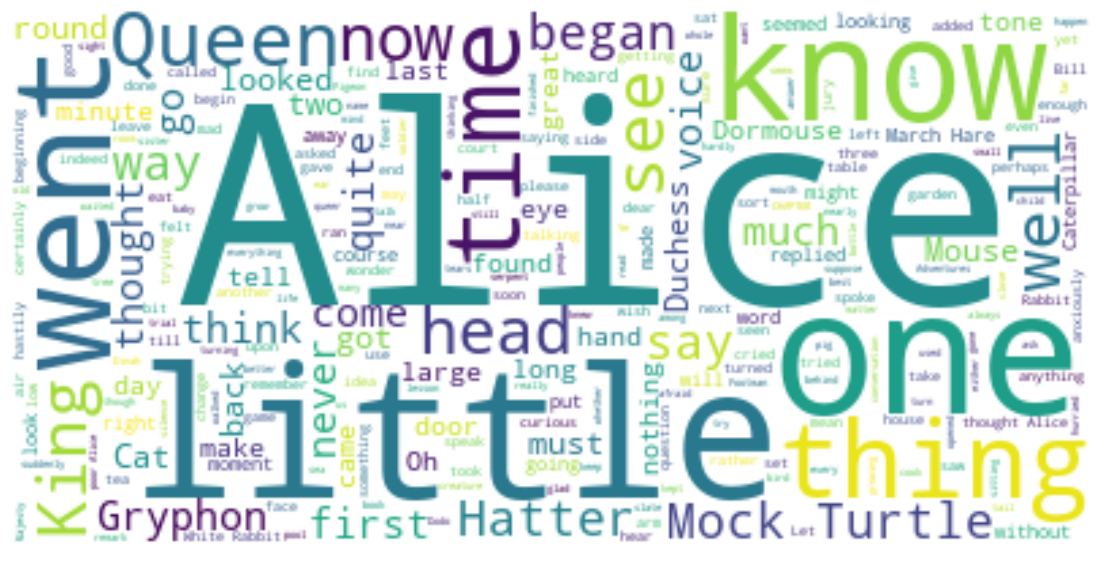

In [27]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Luar biasa! Terlihat sangat menarik! Hal keren lainnya yang dapat kalian terapkan dengan package word_cloudadalah melapiskan kata-kata ke mask dalam bentuk apa pun. Mari kita gunakan mask Alice dan kelincinya. Kami sudah membuatkan mask untuk kalian, jadi mari lanjutkan dan unduh dan beri nama alice_mask.png.

In [28]:
alice_mask = np.array(Image.open('alice_mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


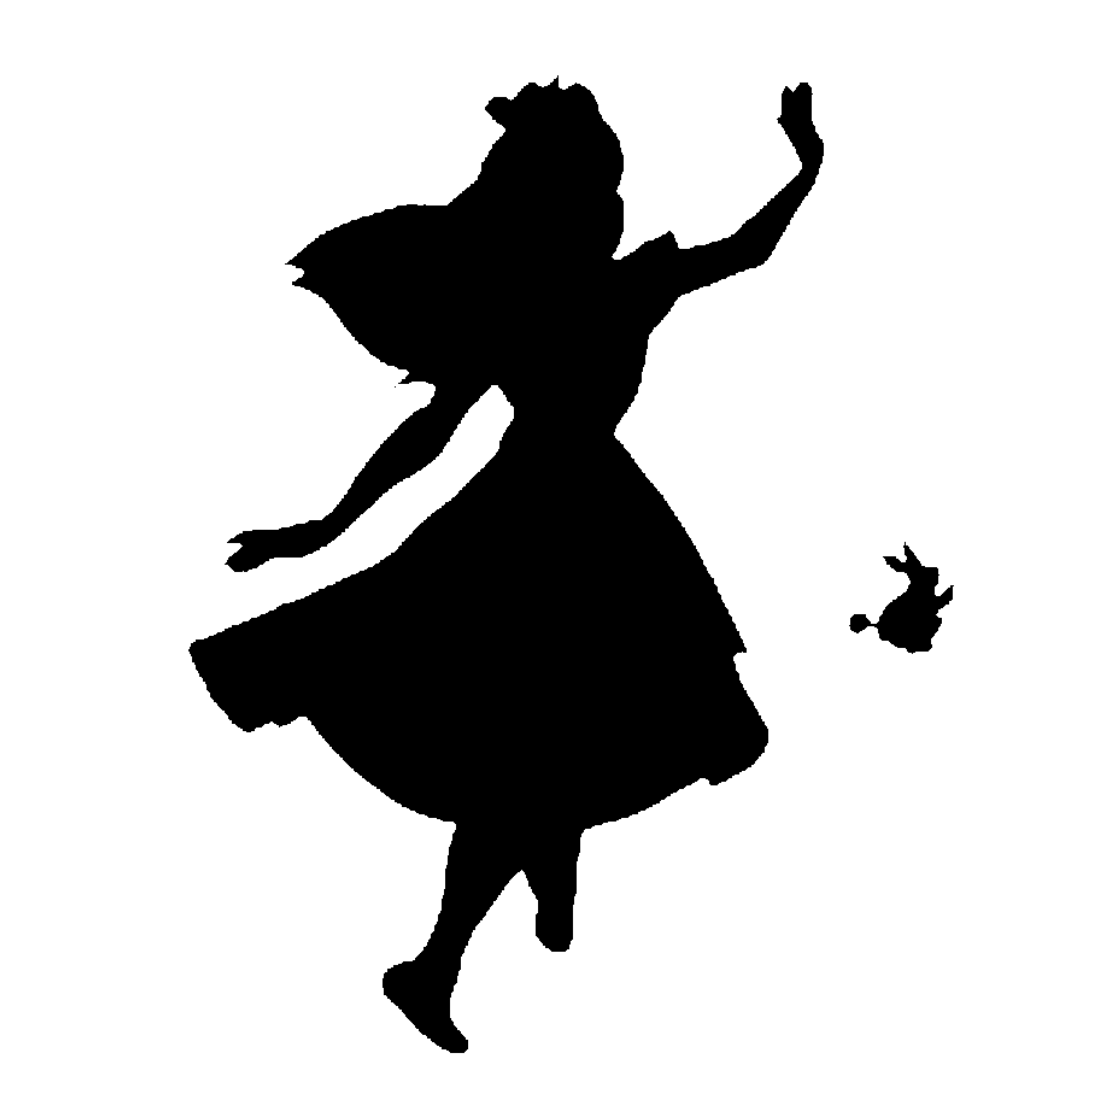

In [29]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Membentuk word cloud sesuai dengan masking sangat mudah menggunakan word_cloud . Agar simple, kita akan terus menggunakan 2000 kata pertama dalam novel.

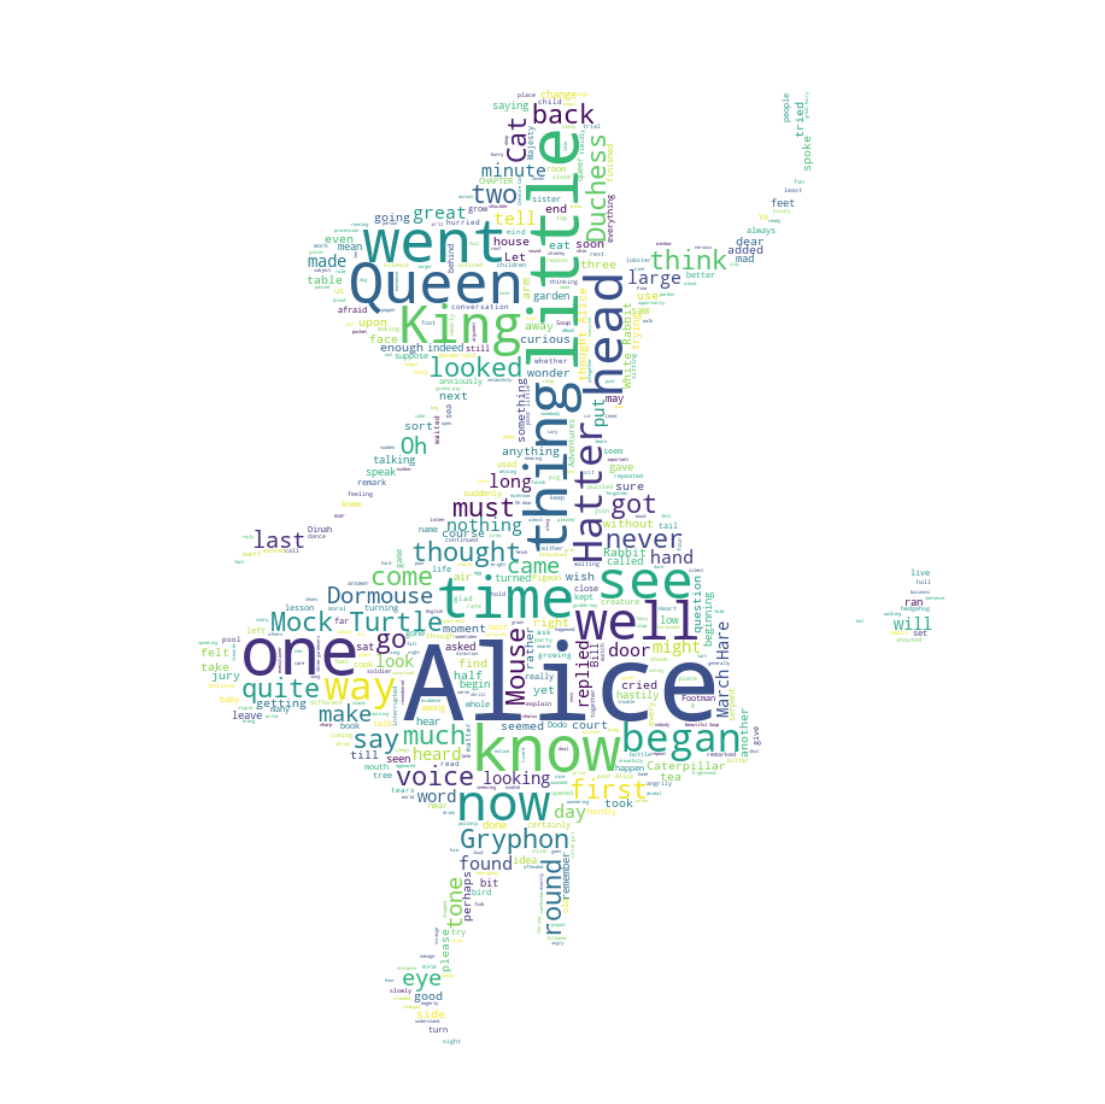

In [30]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Sayangnya data keimigrasian kita tidak memiliki data teks apapun, tapi dimana ada kemauan pasti ada jalan. Mari kita buat contoh data teks dari dataset imigrasi kita, katakanlah data teks 90 kata.

Mari kita ingat seperti apa data kita.

In [31]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [32]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Menggunakan countries dengan nama satu kata, mari kita duplikat nama masing-masing negara berdasarkan seberapa besar kontribusi mereka terhadap total imigrasi.

In [33]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

Kita tidak berurusan dengan stopwords apa pun di sini, jadi tidak perlu passing saat membuat kata cloud.

In [34]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


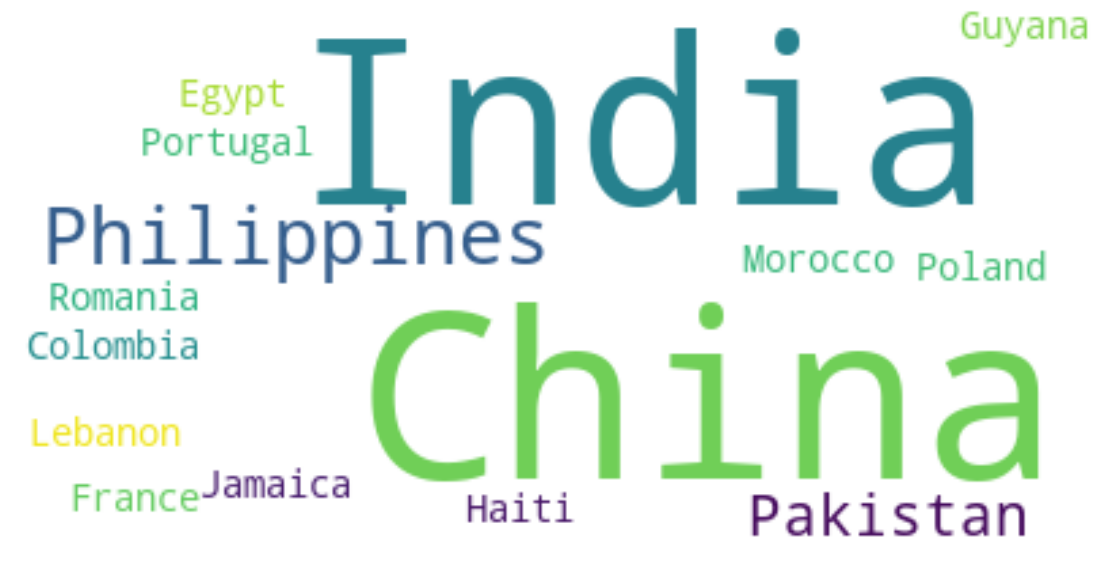

In [35]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Menurut word cloud di atas, sepertinya mayoritas orang yang berimigrasi berasal dari salah satu dari 15 negara yang ditampilkan oleh word cloud. Satu visual keren yang bisa kalian bangun, mungkin menggunakan peta Kanada dan masking dan melapiskan word cloud di atas peta Kanada. Itu akan menjadi visual yang menarik untuk dibangun!

## Regression Plots

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. You can learn more about seaborn by following this link and more about seaborn regression plots by following this link.

Di section ini, kita akan menjelajahi seaborn dan melihat seberapa efisiennya membuat garis regresi dan menyesuaikannya menggunakan pustaka ini!

Mari kita install seaborn
Buat dataframe baru yang menyimpan jumlah total imigran yang mendarat ke Kanada per tahun dari 1980 hingga 2013.

In [38]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


Dengan seaborn, membuat plot regresi semudah memanggil fungsi regplot .

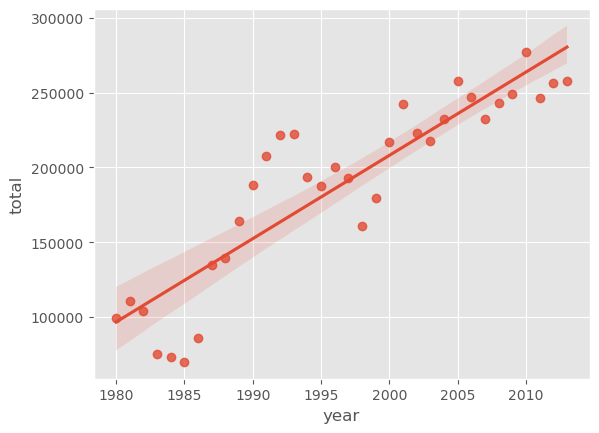

In [39]:
ax = sns.regplot(x='year', y='total', data=df_tot)

Kita juga dapat menyesuaikan warna scatter plot dan garis regresi. Mari kita ubah warnanya menjadi hijau.

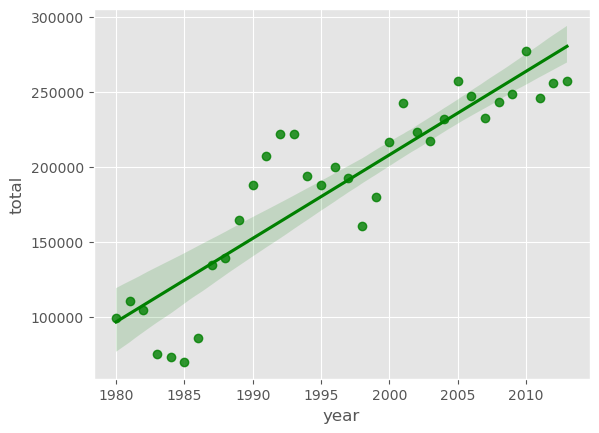

In [40]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

Kita selalu dapat menyesuaikan bentuk marker, jadi sebagai ganti circular markers, mari gunakan '+'.

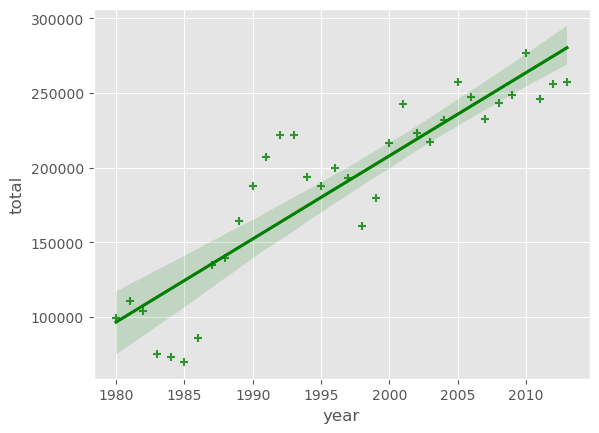

In [42]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Mari kita perbesar plotnya sedikit sehingga lebih menarik untuk dilihat.

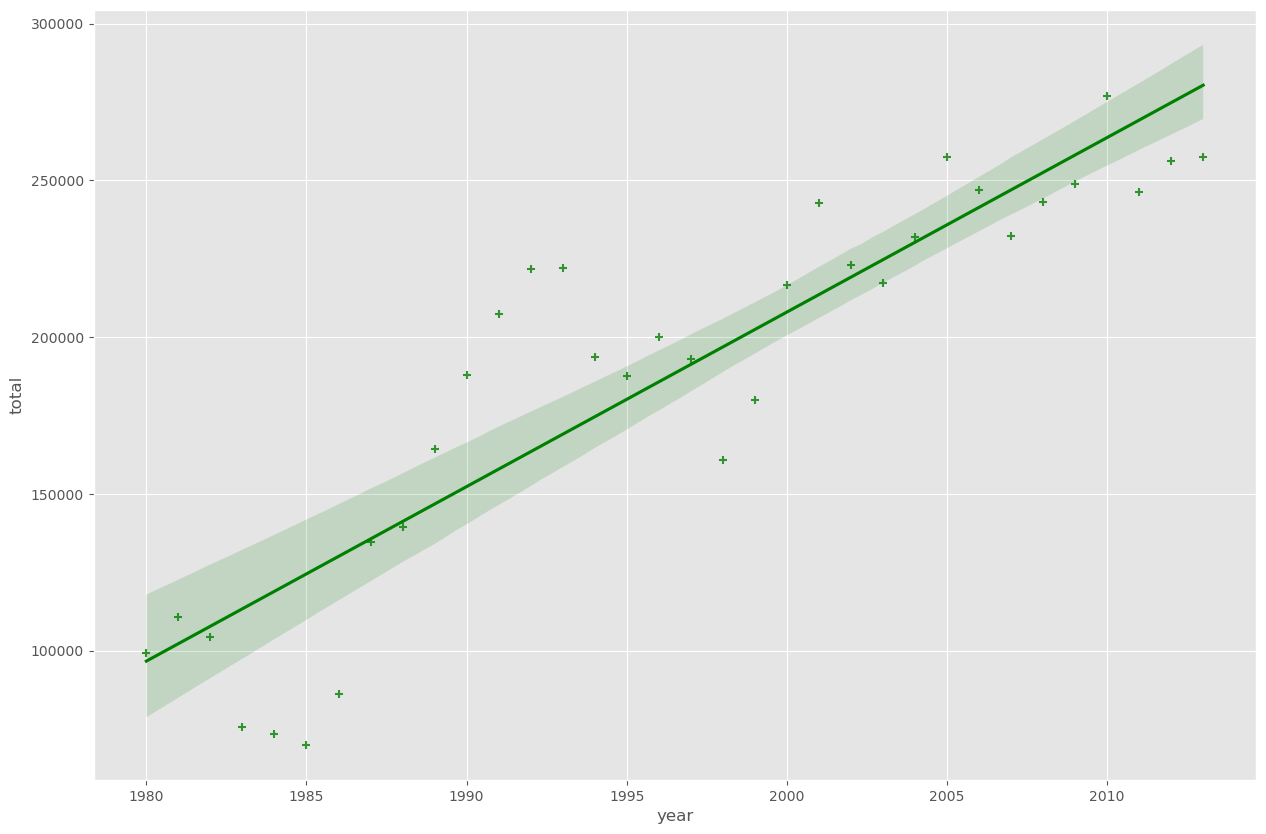

In [43]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Dan mari kita tingkatkan ukuran marker sehingga cocok dengan ukuran baru dari gambar tersebut, dan tambahkan judul serta label x dan y.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

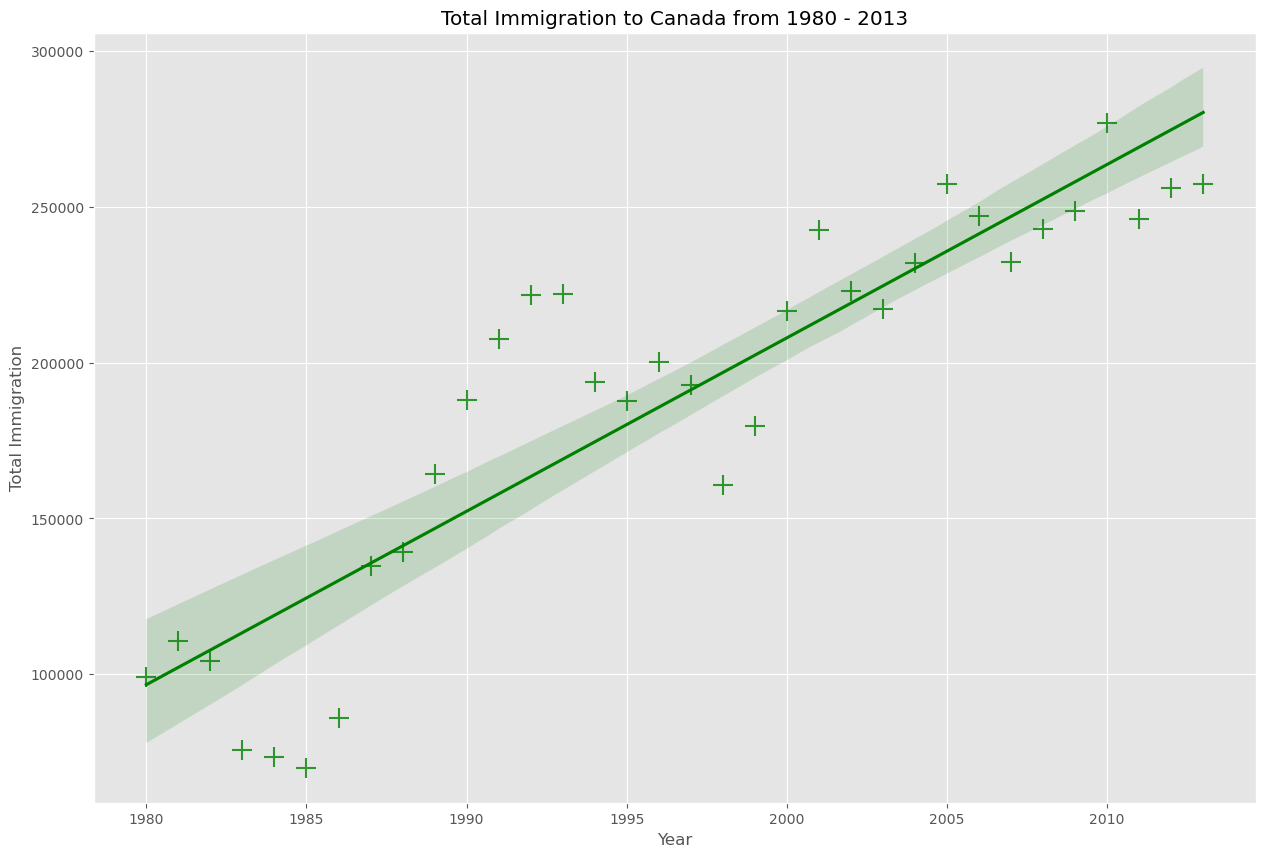

In [44]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Dan terakhir, tingkatkan ukuran font pada label tanda centang, judul, dan label x dan y agar tidak terlihat berbeda!

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

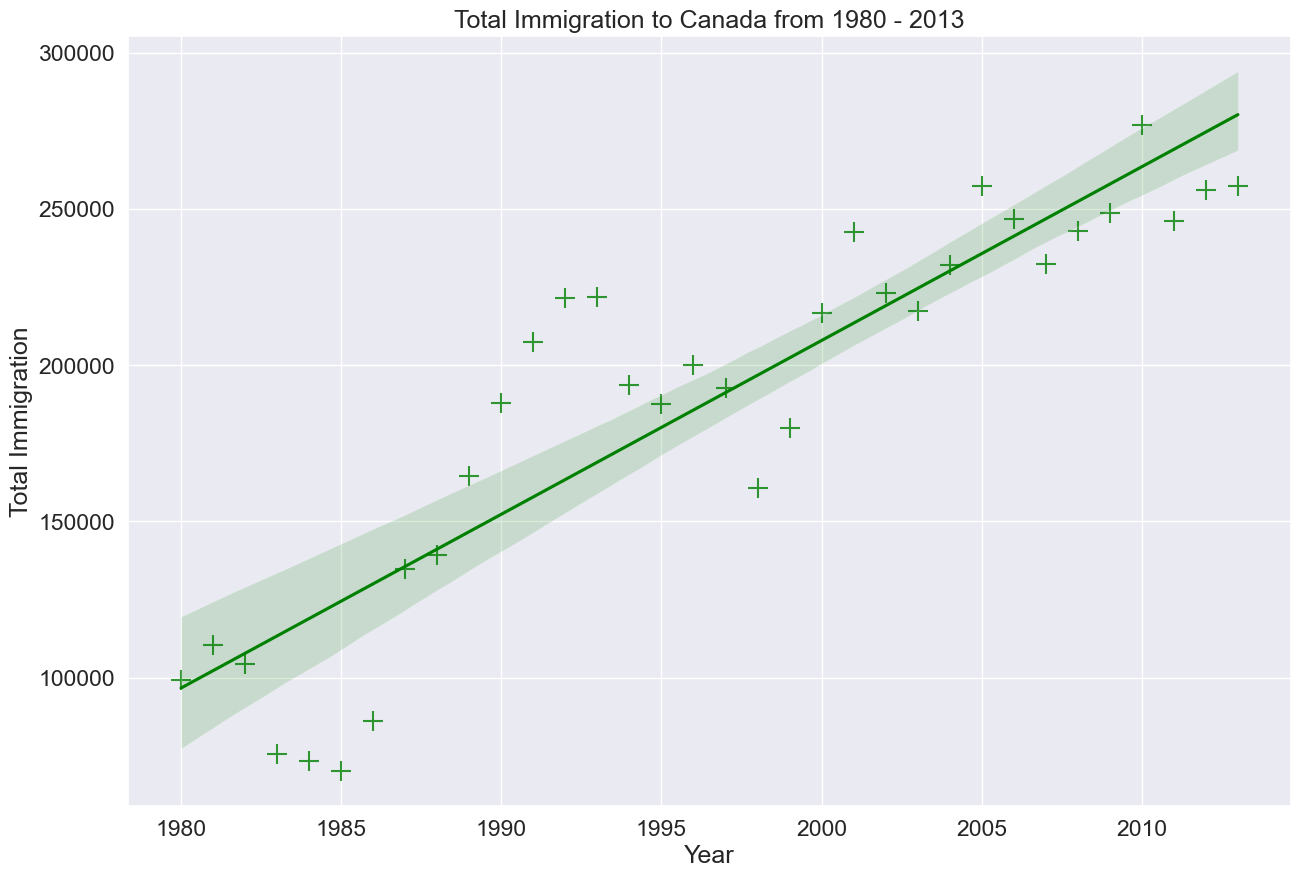

In [45]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Jika kalian bukan penggemar background ungu, kalian dapat dengan mudah mengubah gaya ke latar belakang polos putih.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

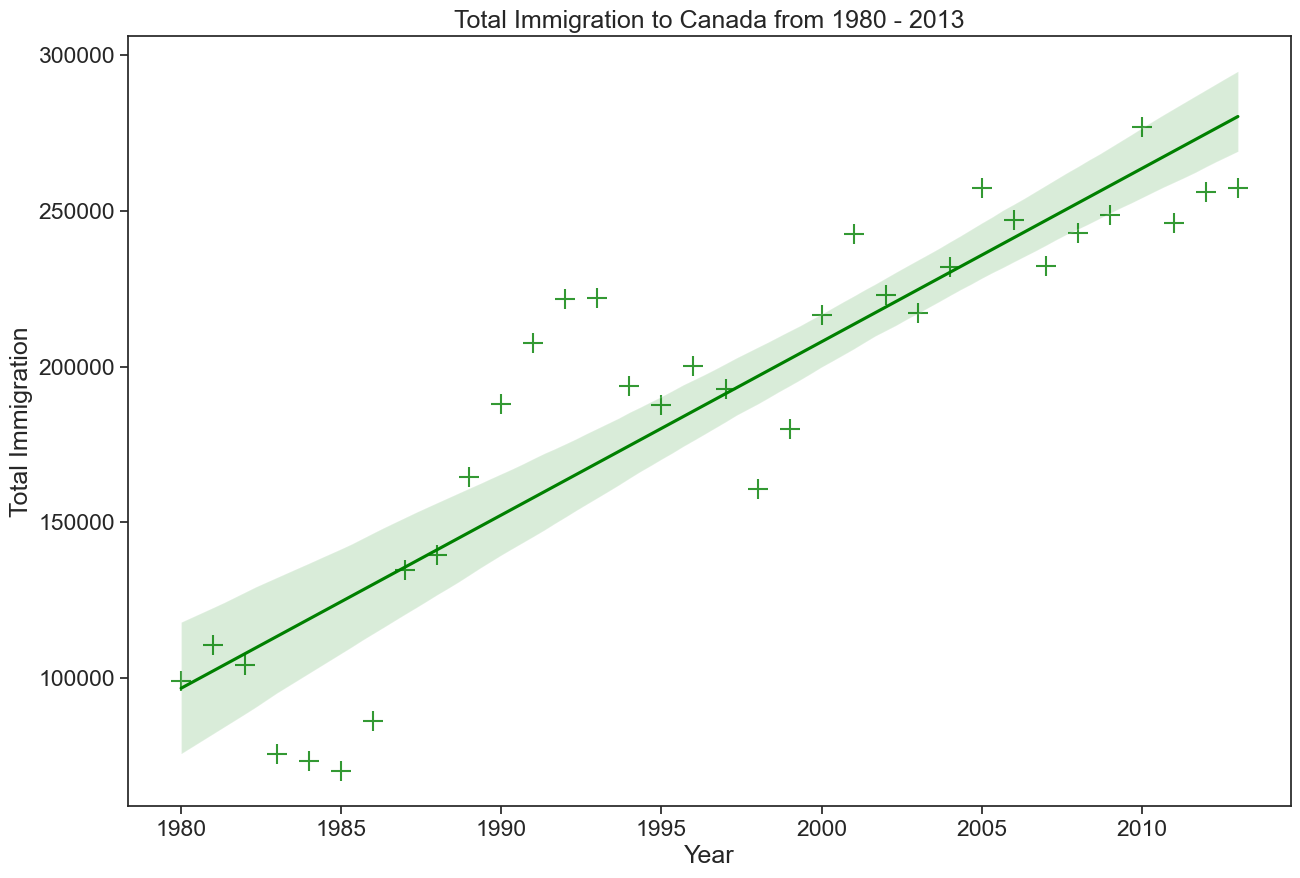

In [46]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Atau ke latar belakang putih dengan garis kisi/grid lines.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

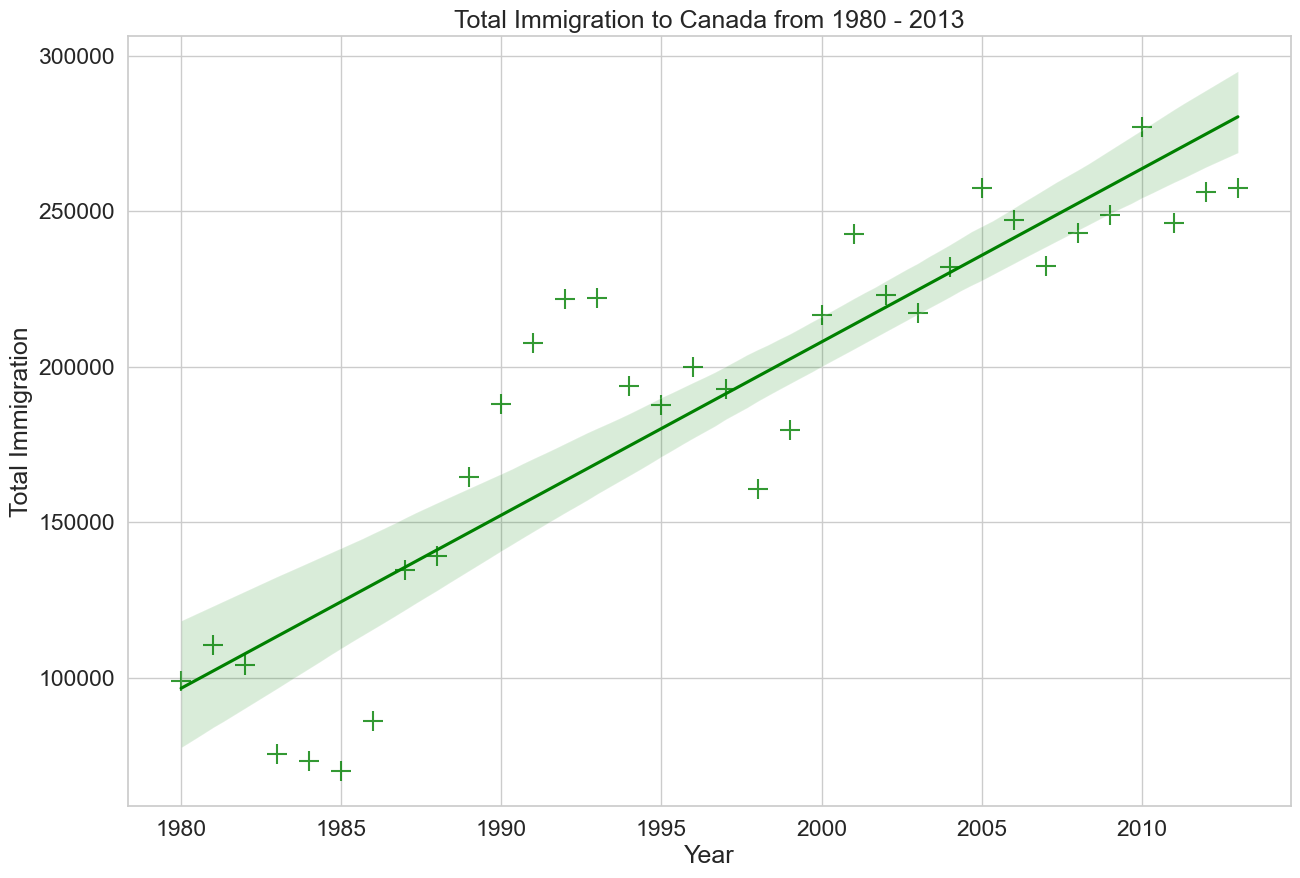

In [47]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Question: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.



Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

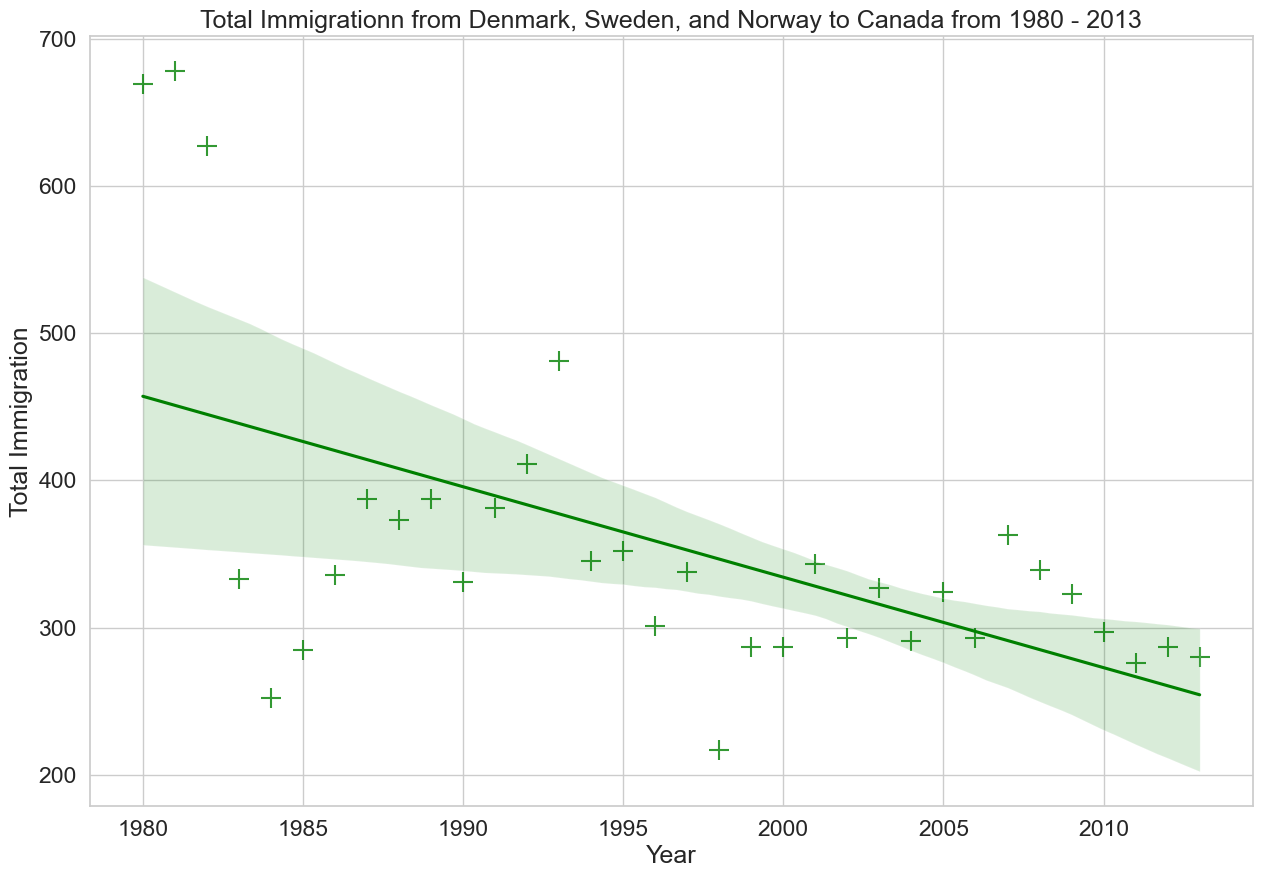

In [48]:
### type your answer here
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
# reset index in place
df_total.reset_index(inplace=True)
# rename columns
df_total.columns = ['year', 'total']
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
# define figure size
plt.figure(figsize=(15, 10))
# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')
